In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import wavio
import IPython

In [2]:
def lms(un, dn, M, mu):
    """
    :param un: unknow signal
    :type  un: numpy.ndarray
    :param dn: expectation signal
    :type  dn: numpy.ndarray
    :param M : length of FIR filter
    :type  M : int
    :param mu: learning rate
    :type  mu: float
    :return: yn, en
    """
    # To ensure the length of un and dn is same
    ITER = min(len(un),len(dn)) 
    
    # Signal buffer
    u = np.zeros(M)
    
    # FIR Weights
    w = np.zeros(M)
    
    # Estimated Signal, FIR Product
    yn = np.zeros(ITER) 
    
    # Error Signal, difference between estimation and expectation
    en = np.zeros(ITER) 
    
    for n in range(ITER):
        u[1:M] = u[0:M-1]
        u[0] = un[n]
        yn[n] = np.dot(w.T, u)
        en[n] = dn[n] - yn[n]
        w = w + mu * en[n] * u
    return yn, en

def nlms(un, dn, M, mu):
    """
    :param un: unknow signal
    :type  un: numpy.ndarray
    :param dn: expectation signal
    :type  dn: numpy.ndarray
    :param M : length of FIR filter
    :type  M : int
    :param mu: learning rate
    :type  mu: float
    :return: yn, en
    """
    # To ensure the length of un and dn is same
    ITER = min(len(un),len(dn)) 
    
    # Signal buffer
    u = np.zeros(M)
    
    # FIR Weights
    w = np.zeros(M) 
    
    # Estimated Signal, FIR Product
    yn = np.zeros(ITER) 
    
    # Error Signal, difference between estimation and expectation
    en = np.zeros(ITER) 
    
    for n in range(ITER):
        u[1:M] = u[0:M-1]
        u[0] = un[n]
        yn[n] = np.dot(w.T, u)
        en[n] = dn[n] - yn[n]
        w = w + mu * en[n] * u / (np.dot(u, u) + 1e-7)
    return yn, en

In [3]:
def leaky_lms(un, dn, M, mu, leaky):
    ITER = min(len(un),len(dn)) 
    u = np.zeros(M)
    w = np.zeros(M) 
    yn = np.zeros(ITER) 
    en = np.zeros(ITER) 
    
    for n in range(ITER):
        u[1:M] = u[0:M-1]
        u[0] = un[n]
        yn[n] = np.dot(w.T, u)
        en[n] = dn[n] - yn[n]
        w = (1 - mu * leaky) * w + mu * en[n] * u
    return yn, en

def modified_leaky_lms(un, dn, M, mu, leaky):
    ITER = min(len(un),len(dn)) 
    u = np.zeros(M)
    w = np.zeros(M) 
    yn = np.zeros(ITER) 
    en = np.zeros(ITER) 
    
    for n in range(ITER):
        u[1:M] = u[0:M-1]
        u[0] = un[n]
        yn[n] = np.dot(w.T, u)
        en[n] = dn[n] - yn[n]
        w = (1 - mu * leaky) * w + mu * en[n] * np.sign(u)
    return yn, en

In [4]:
def wav_processor(input_data):
    output_data = input_data
    for index, data in enumerate(input_data):
        if data > 2:
            output_data[index] = 2
        elif data < -2:
            output_data[index] = -2
    return output_data

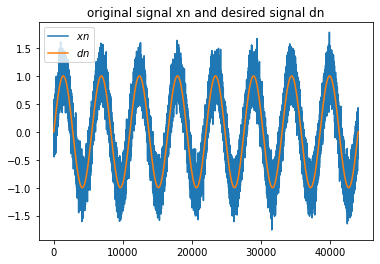

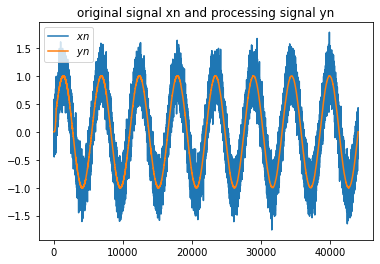

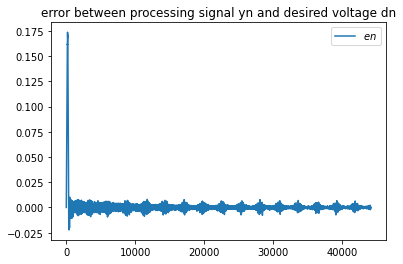

In [5]:
# iteration time
itr = 44100
# FIR taps length
M = 1024
# moving steps, learning rate
mu = 0.002 

noise_size = itr
X = np.linspace(0,4 * np.pi, itr, endpoint=True)
Y = np.sin(X * 4)
signal_array = Y
noise_array = np.random.normal(0, 0.2, noise_size)
signal_noise_array = signal_array + noise_array  

xn = signal_noise_array 
dn = signal_array 

yn, en = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [6]:
noise_raw = wavio.read("echo_cancellation/white_noise.wav")
room_raw = wavio.read("echo_cancellation/room_white_noise.wav")

noise = noise_raw.data[:, 0]
noise = noise.astype(np.float32, order='C') / 32767.0

room = room_raw.data[:, 0]
room = room.astype(np.float32, order='C') / 32767.0
delay = 256
room = np.append(np.zeros(delay), room)[:-delay]

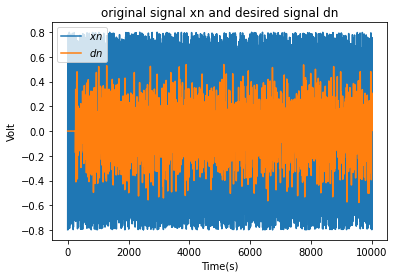

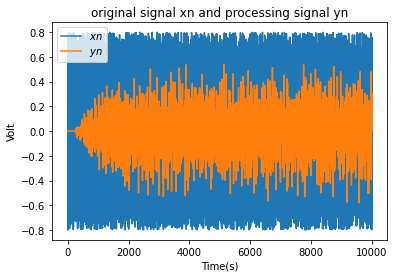

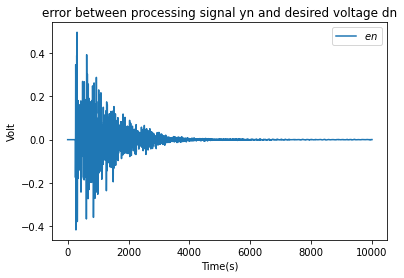

In [7]:
M = 512
mu = 0.005
beat = 88200
leaky = 0.005

xn = noise[:10000]
dn = room[:10000]

(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [8]:
news_raw = wavio.read("echo_cancellation/news.wav")
room_news_raw = wavio.read("echo_cancellation/room_news.wav")

news = news_raw.data[:, 0]
news = news.astype(np.float32, order='C') / 32767.0

room = room_news_raw.data[:, 0]
room = room.astype(np.float32, order='C') / 32767.0
delay = 256
room = np.append(np.zeros(delay), room)[:-delay]

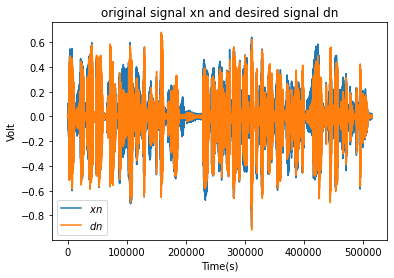

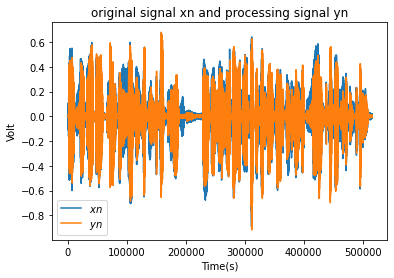

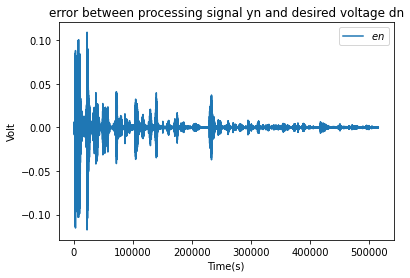

In [9]:
xn = news
dn = room
M = 512
mu = 0.005

(yn,en) = lms(xn, dn, M, mu)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [10]:
female_news_raw = wavio.read("echo_cancellation_conversation/female_news.wav")
room_news_raw = wavio.read("echo_cancellation_conversation/room_female_news.wav")

female_news = female_news_raw.data[:, 0]
female_news = female_news.astype(np.float32, order='C') / 32767.0

room = room_news_raw.data[:, 0]
room = room.astype(np.float32, order='C') / 32767.0
delay = 128
room = np.append(np.zeros(delay), room)[:-delay]

male_news_raw = wavio.read("echo_cancellation_conversation/male_news.wav")
male_news = male_news_raw.data[:, 0]
male_news = male_news.astype(np.float32, order='C') / 32767.0

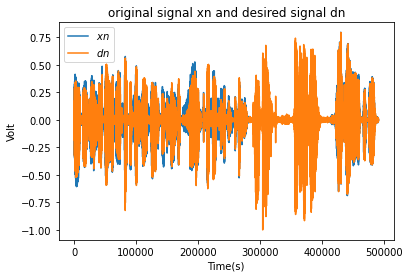

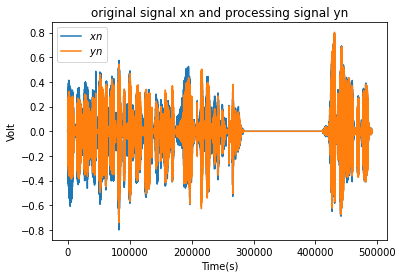

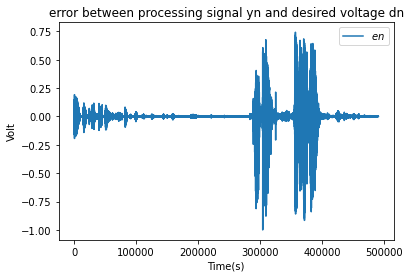

In [11]:
xn = female_news
dn = room + male_news
M = 256
mu = 0.0005
leaky = 0.000005

(yn,en) = modified_leaky_lms(xn, dn, M, mu, leaky)

plt.figure(1)
plt.plot(xn,label="$xn$")
plt.plot(dn,label="$dn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and desired signal dn")
plt.legend() 

plt.figure(2)
plt.plot(xn,label="$xn$")
plt.plot(yn,label="$yn$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("original signal xn and processing signal yn")
plt.legend()
    
plt.figure(3)
plt.plot(en,label="$en$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("error between processing signal yn and desired voltage dn")
plt.legend()

plt.show()

In [12]:
sr = 44100
wavio.write("en.wav", en, sr, sampwidth=3)
wavio.write("yn.wav", yn, sr, sampwidth=3)